# Ex3 - Perceptron

### Imports

In [41]:
import numpy as np
import matplotlib.pyplot as plt

### Perceptron

In [42]:
class Perceptron:

    def __init__(self, lr=0.5, epoch=25):
        """
        :param lr: learning rate
        :param epoch: Number of iterations
        """
        
        self.lr = lr
        self.epoch = epoch

        self.weights = None
        self.cost = []

    def activation(self, z):
        return 1.0 if (z > 0) else -1.0
    
    def score(self):
        samples, _ = X.shape
        last_error = self.cost[len(self.cost) - 1]
        return (1-last_error/samples)*100

    def fit(self, X, y):
        """
        X --> Inputs
        y --> labels

        m --> samples
        n --> features
        
        self.weights --> Initializing n weights to zeros, +1 for bias
        self.cost --> Empty list to store how many examples were mistakes at this iteration
        """
        
        m, n = X.shape
        self.weights = np.zeros((n + 1, 1))
        self.n_miss_list = []

        # Training
        for epoch in range(self.epoch):

            # mistakes examples at this iteration.
            error = 0

            for idx, x_i in enumerate(X):

                # Inserting 1 for bias, X0 = 1.
                x_i = np.insert(x_i, 0, 1).reshape(-1, 1)

                # Calculating prediction.
                pred = self.activation(x_i.T @ self.weights)

                # Updating wrong prediction.
                if (np.squeeze(pred) - y[idx]) != 0:
                    self.weights += self.lr * ((y[idx] - pred) * x_i)
                    error += 1

            self.cost.append(error)
            
        return self.weights

### Perceptron Demo

#### Read Data

In [43]:
def readData(file_name):
    data = np.genfromtxt(file_name, dtype=str, encoding=None, skip_footer=0)
    X, y = data[:, :2], data[:, -1]
    return X.astype(float), y.astype(float)

In [44]:
X, y = readData('two_circle.txt')

classifier = Perceptron()
weights = classifier.fit(X, y)

#### Weights

In [45]:
print("Weights Output Vector:\n", weights)

Weights Output Vector:
 [[ 0.  ]
 [-7.6 ]
 [ 7.81]]


#### Scoure

In [46]:
scoure = classifier.score()

print("Scoure:\n", scoure)

Scoure:
 100.0


#### Plotting

In [47]:
x_ = [min(X[:,0]), max(X[:,0])]
a = -weights[1] / weights[2]
b = -weights[0] / weights[2]
y_ = (a * x_) + b

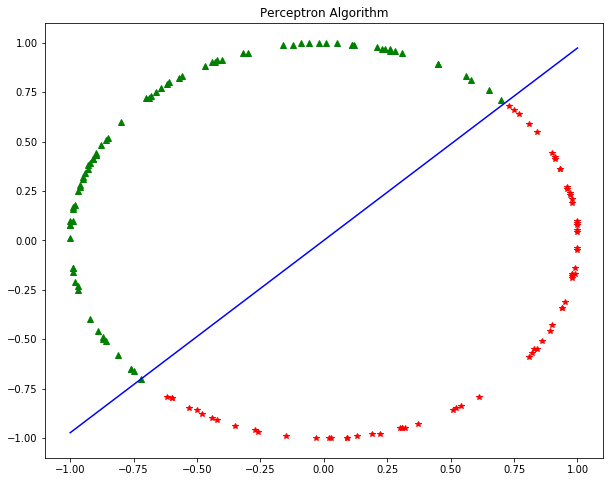

In [48]:
fig = plt.figure(figsize=(10, 8))

plt.plot(X[:, 0][y == -1], X[:, 1][y == -1], "r*")
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], "g^")
plt.title("Perceptron Algorithm")
plt.plot(x_, y_, 'b-')